In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import periodogram
from math import ceil

In [41]:
# msg = np.random.randint(low=0, high=2, size=int(1e6))
msg = np.random.randint(low=0, high=2, size=int(1e3))
# BPSK parameters
Eb = 0.001
fs = 10000
Tb = 0.001
br=1/Tb;                 # bit rate
fc1=br;                 #carrier frequency for information as 1
fc2=ceil(fc1 + 1/Tb)                  #carrier frequency for information as 0

In [42]:
t = np.linspace(0, Tb, int(Tb*fs),endpoint=False)
s = np.sqrt(2/Tb)*np.cos(2*np.pi*fc1*t)
s1=np.sqrt(2/Tb)*np.cos(2*np.pi*fc2*t)
orthocheck=s1.dot(s)

In [43]:
orthocheck

-4.547473508864641e-13

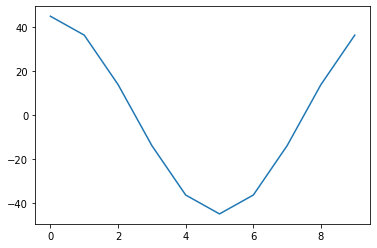

In [44]:
plt.plot(s)

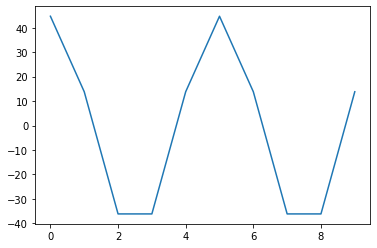

In [45]:
plt.plot(s1)

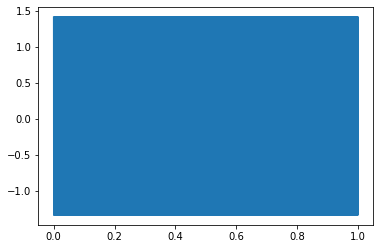

In [46]:
# FSK Transmitter
signal = []
t = np.linspace(0, Tb, int(Tb*fs))
for i in msg:
    s = np.sqrt(2*Eb/Tb)*np.cos(2*np.pi*fc1*t)
    s1=np.sqrt(2*Eb/Tb)*np.cos(2*np.pi*fc2*t)
    if i == 0:
        s = s1
    signal.extend(s)
t = np.linspace(0, len(msg)*Tb, int(len(msg)*Tb*fs))

fig, ax = plt.subplots()
ax.plot(t, signal)

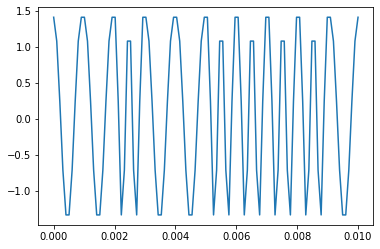

In [47]:
tplt = np.linspace(0, 10*Tb, int(10*Tb*fs))
plt.plot(tplt,signal[:len(tplt)])

0.00039722511325671793


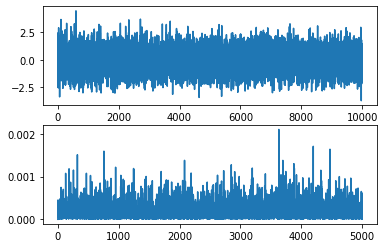

In [48]:
ns = len(signal)
noise = np.random.normal(size=ns)

f, psd = periodogram(noise, fs)

fig, ax = plt.subplots(2,1)
ax[0].plot(noise)
ax[1].plot(f, psd)

psd_av = np.mean(psd)
N0 = 2*psd_av
signalwnoise= signal+noise
print(N0)

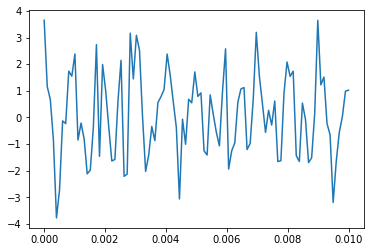

In [49]:
tplt2 = np.linspace(0, 10*Tb, int(10*Tb*fs))
plt.plot(tplt,signalwnoise[:len(tplt2)])

In [50]:
# Non coherent fsk detector
t = np.linspace(0, Tb, int(Tb*fs))
Ts=int(Tb*fs) # no of samples of carrier for 1 bit
e1=np.cos(2*np.pi*fc1*t) #cosomega1t
e2=np.sin(2*np.pi*fc1*t) #sinomega1t
e3=np.cos(2*np.pi*fc2*t) #cosomega2t
e4=np.sin(2*np.pi*fc2*t) #sinomega2t
decmsg=[]
for x in range(int(len(signalwnoise)/Ts)):
    samplearr=signalwnoise[x*Ts:(x+1)*Ts]
    e5=(samplearr*e1).sum()/len(samplearr)
    e6=(samplearr*e2).sum()/len(samplearr)
    e7=(samplearr*e3).sum()/len(samplearr)
    e8=(samplearr*e4).sum()/len(samplearr)
    
    e9=e5+e6
    e10=e7+e8
    if e9<e10:
        decmsg.append(0)
    else:
        decmsg.append(1)
        

In [51]:
np.array(decmsg[10:30]),msg[10:30]

(array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0]),
 array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0]))

In [52]:
# bit error probability
Pb=(1/2)*np.exp(-Eb/N0)
Pb_pr = np.count_nonzero(msg != decmsg) / len(msg)
Pb,Pb_pr

(0.04033194776353452, 0.061)